In [24]:
import os
import warnings 
warnings.filterwarnings('ignore')

from glob import glob
import numpy as np 
import pandas as pd
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [25]:
meta = pd.read_csv("/Users/jdapeman/Documents/Skin-Cancer-Detection-HAM10000/archive/HAM10000_metadata.csv")

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [26]:
base_skin_dir = os.path.join('..', '/Users/jdapeman/Documents/Skin-Cancer-Detection-HAM10000/archive')

# Dictionary to map image IDs to their corresponding file paths

imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

In [27]:
meta['path'] = meta['image_id'].map(imageid_path_dict.get)

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/Users/jdapeman/Documents/Skin-Cancer-Detectio...


Text(0.5, 1.0, 'Frequency Distribution of Classes')

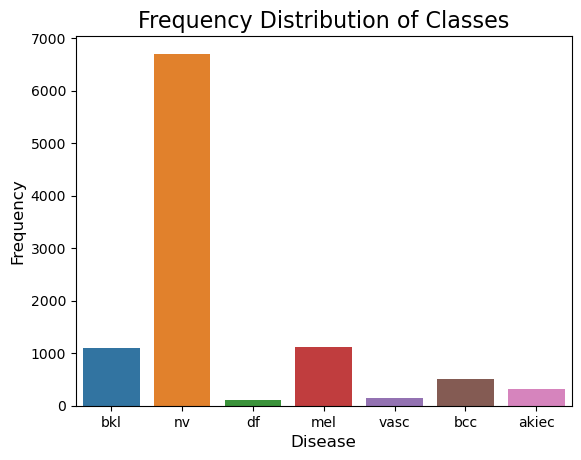

In [35]:
sns.countplot(x = 'dx', data = meta)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

In [36]:
meta['dx_code'] = pd.Categorical(meta['dx']).codes

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,dx_code
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0


<Axes: >

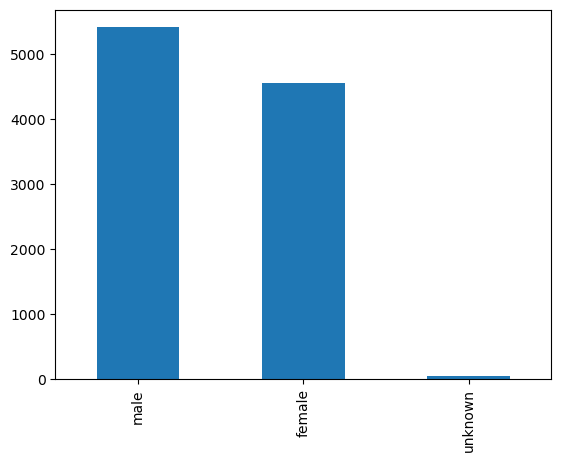

In [39]:
meta['sex'].value_counts().plot(kind='bar')

<Axes: >

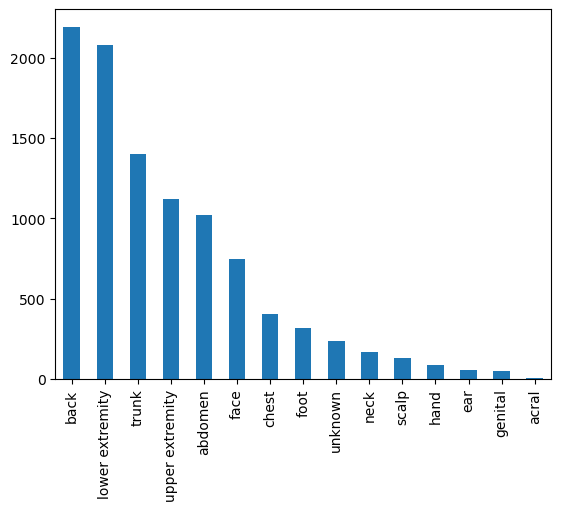

In [41]:
meta['localization'].value_counts().plot(kind='bar')

<Axes: >

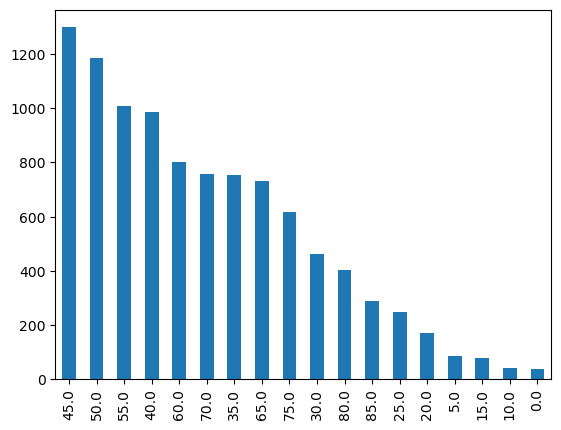

In [42]:
meta['age'].value_counts().plot(kind='bar')

In [43]:
print(meta.isnull().sum())


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dx_code          0
dtype: int64


In [44]:
# Replace null with mean
meta['age'].fillna((meta['age'].mean()), inplace=True)

In [45]:
from tqdm import tqdm
import numpy as np
from PIL import Image

image_paths = list(meta['path'])
meta['image'] = [np.asarray(Image.open(path).resize((100, 75)), dtype=np.float32) / 255.0 for path in tqdm(image_paths)]

meta

100%|█████████████████████████████████████| 10015/10015 [01:46<00:00, 94.01it/s]


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,dx_code,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2,"[[[0.74509805, 0.6, 0.7607843], [0.7529412, 0...."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2,"[[[0.09019608, 0.050980393, 0.08627451], [0.09..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2,"[[[0.7254902, 0.49803922, 0.5372549], [0.74117..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2,"[[[0.09411765, 0.043137256, 0.06666667], [0.10..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,2,"[[[0.5254902, 0.3529412, 0.44313726], [0.57647..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0,"[[[0.60784316, 0.5372549, 0.5803922], [0.60392..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0,"[[[0.019607844, 0.023529412, 0.015686275], [0...."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0,"[[[0.4392157, 0.4, 0.4117647], [0.49803922, 0...."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/Users/jdapeman/Documents/Skin-Cancer-Detectio...,0,"[[[0.62352943, 0.47843137, 0.57254905], [0.623..."


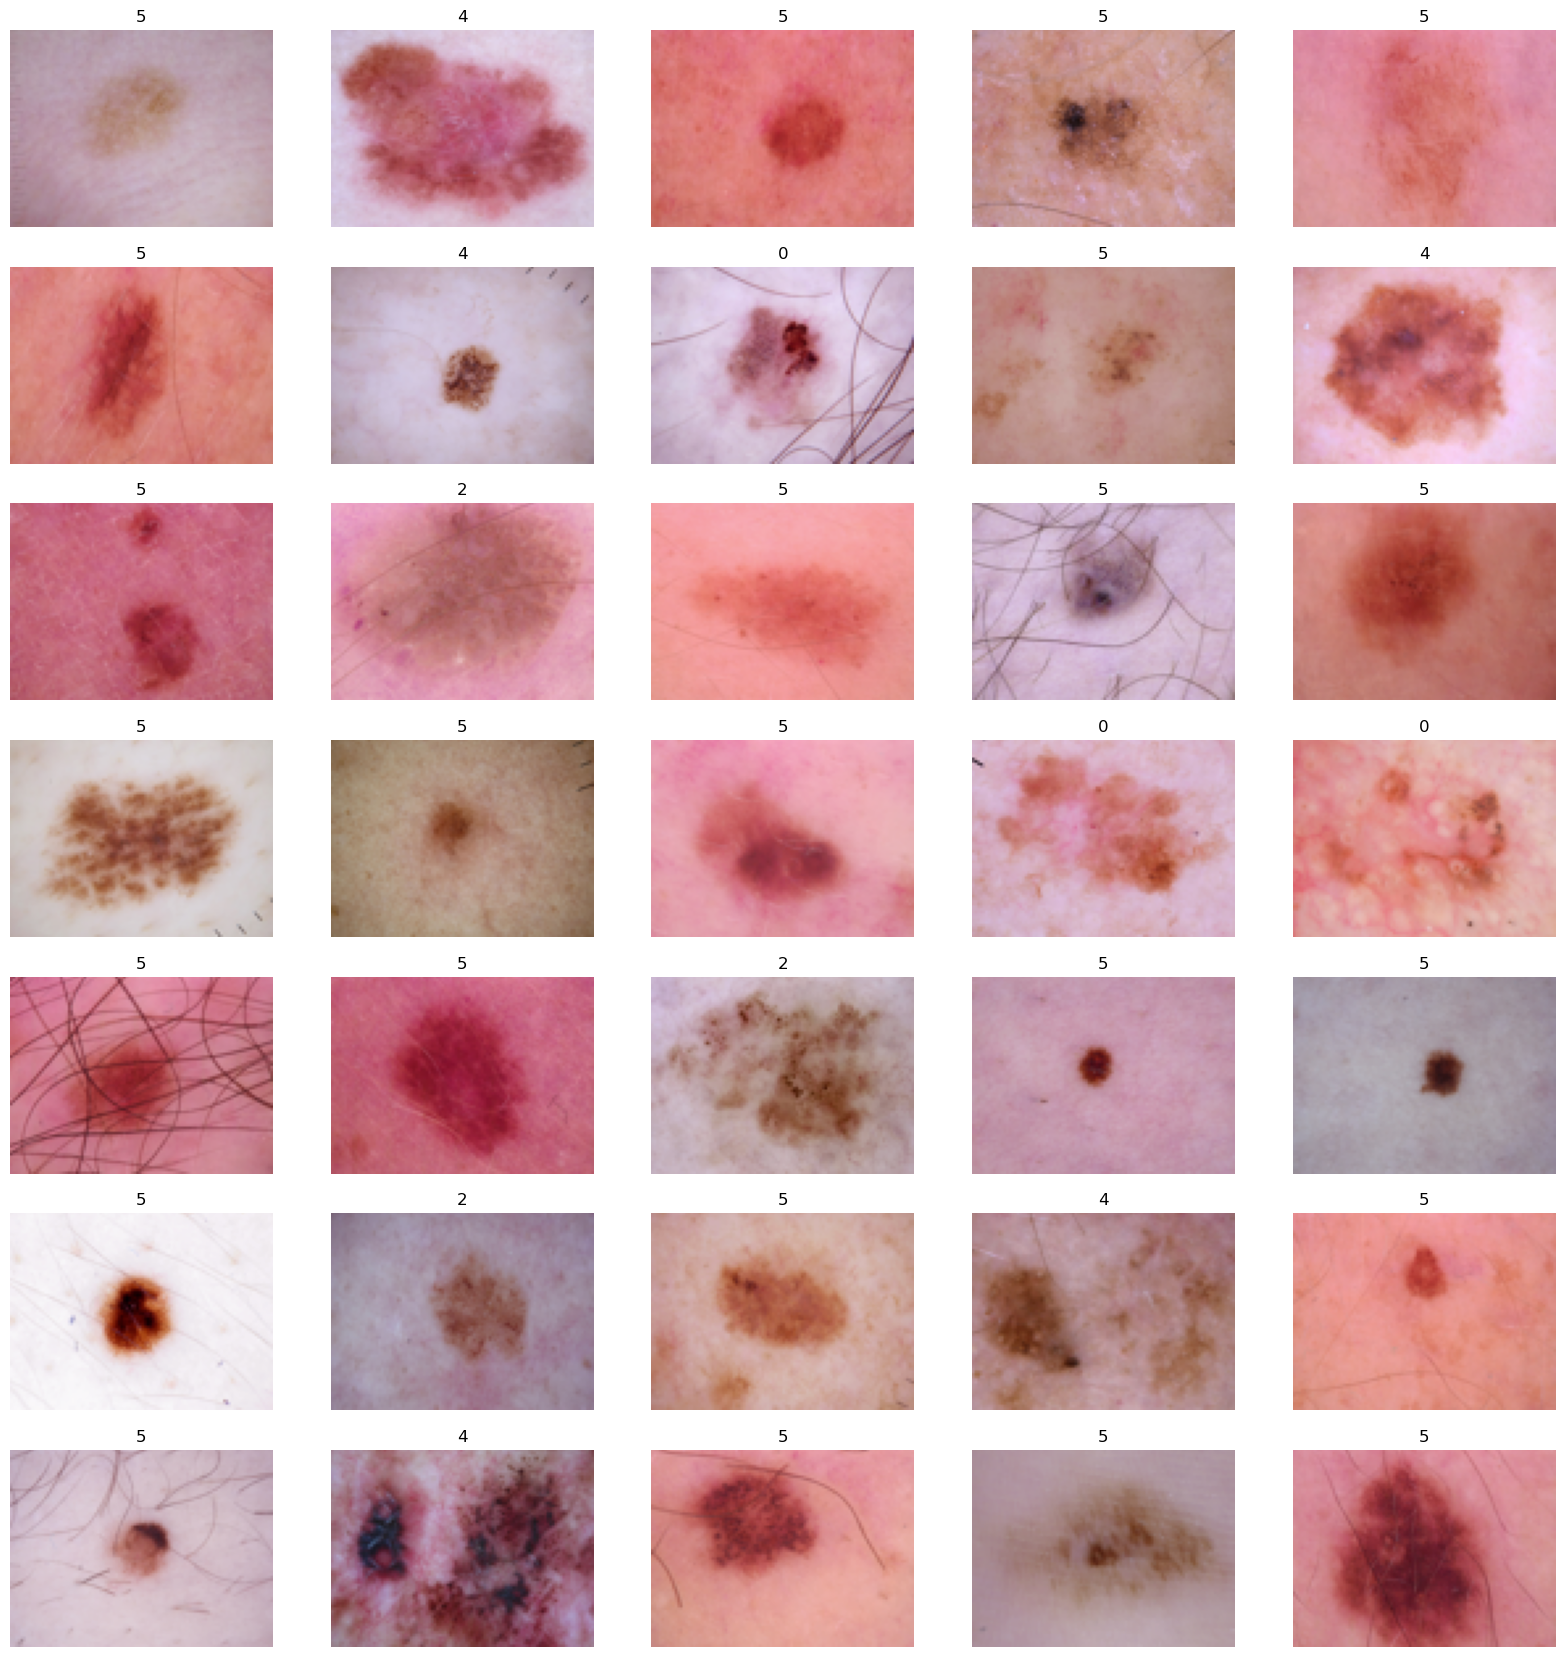

In [48]:
# Create a list of image samples
image_samples = np.random.choice(meta.shape[0], 7 * 5, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(7, 5, figsize=(4 * 5, 3 * 7))

# Plot the image samples
for i, ax in enumerate(axes.flatten()):
    row = meta.iloc[image_samples[i]]
    ax.imshow(row['image'])
    ax.set_title(row['dx_code'])
    ax.axis('off')

# Save the figure
fig.savefig('category_samples.png', dpi=300)

In [49]:
from keras.utils import to_categorical

X = meta['image']
y = to_categorical(meta['dx_code'])

2023-08-08 10:55:23.523959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
print(X_train.shape , "\n")
print(X_train[1].shape , "\n")

(8012,) 

(75, 100, 3) 



In [52]:
type(X_train)


pandas.core.series.Series

In [53]:
# Convert Pandas Series to NumPy arrays
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

In [54]:
# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train = X_train.reshape(X_train.shape[0], 75, 100, 3)
X_test = X_test.reshape(X_test.shape[0], 75, 100, 3)

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [56]:
# Function to plot the confusion matrix with Plotly
def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        colorscale = 'Plasma'
    else:
        colorscale = 'Magma_r'  # Reversed 'Magma' colorscale for non-normalized matrix

    annotations = []
    for i in range(len(classes)):
        for j in range(len(classes)):
            annotations.append(
                {
                    'x': classes[j],
                    'y': classes[i],
                    'text': str(cm[i, j]),
                    'showarrow': False,
                    'font': {'color': 'red' if cm[i, j] > 0.5 else 'black'}
                }
            )

    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=list(classes),
        y=list(classes),
        colorscale=colorscale,
        colorbar=dict(title='Normalized' if normalize else 'Count'),
        showscale=True,
        hoverinfo='z'
    ))

    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted label'),
        yaxis=dict(title='True label'),
        annotations=annotations
    )

    if normalize:
        fig.update_layout(title_text='Normalized Confusion Matrix')
    else:
        fig.update_layout(title_text='Confusion Matrix (Counts)')

    fig.show()

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [58]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained DenseNet-121 model (weights pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 95  # Choose the number of layers you want to freeze
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer for better convergence
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model_dense = Model(inputs=base_model.input, outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,   # Adjust decay_steps 
    decay_rate=0.9       # Adjust decay_rate 
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

Epoch 1/60
133/133 [==============================] - 237s 2s/step - loss: 3.4986 - accuracy: 0.6869 - val_loss: 3.7900 - val_accuracy: 0.6435 - lr: 4.9931e-04
Epoch 2/60
133/133 [==============================] - 229s 2s/step - loss: 1.9692 - accuracy: 0.7787 - val_loss: 1.8268 - val_accuracy: 0.7639 - lr: 4.9861e-04
Epoch 3/60
133/133 [==============================] - 214s 2s/step - loss: 1.4439 - accuracy: 0.7914 - val_loss: 1.8379 - val_accuracy: 0.7594 - lr: 4.9791e-04
Epoch 4/60
133/133 [==============================] - 215s 2s/step - loss: 1.0876 - accuracy: 0.8174 - val_loss: 1.3384 - val_accuracy: 0.7344 - lr: 4.9721e-04
Epoch 5/60
133/133 [==============================] - 213s 2s/step - loss: 0.9036 - accuracy: 0.8094 - val_loss: 0.9332 - val_accuracy: 0.7963 - lr: 4.9651e-04
Epoch 6/60
133/133 [==============================] - 222s 2s/step - loss: 0.7015 - accuracy: 0.8378 - val_loss: 0.8421 - val_accuracy: 0.8018 - lr: 4.9582e-04
Epoch 7/60
133/133 [====================

133/133 [==============================] - 205s 2s/step - loss: 0.1176 - accuracy: 0.9674 - val_loss: 0.7250 - val_accuracy: 0.8447 - lr: 4.8551e-04
Epoch 22/60
133/133 [==============================] - 216s 2s/step - loss: 0.1265 - accuracy: 0.9640 - val_loss: 0.8617 - val_accuracy: 0.8198 - lr: 4.8483e-04
Epoch 23/60
133/133 [==============================] - 224s 2s/step - loss: 0.1433 - accuracy: 0.9605 - val_loss: 1.2458 - val_accuracy: 0.7863 - lr: 4.8415e-04
Epoch 24/60
133/133 [==============================] - 198s 1s/step - loss: 0.1270 - accuracy: 0.9654 - val_loss: 0.8381 - val_accuracy: 0.8313 - lr: 4.8347e-04
Epoch 25/60
133/133 [==============================] - 187s 1s/step - loss: 0.1155 - accuracy: 0.9669 - val_loss: 0.6899 - val_accuracy: 0.8467 - lr: 4.8279e-04
Epoch 26/60
133/133 [==============================] - 202s 2s/step - loss: 0.0771 - accuracy: 0.9796 - val_loss: 0.8564 - val_accuracy: 0.8138 - lr: 4.8212e-04
Epoch 27/60
133/133 [=========================

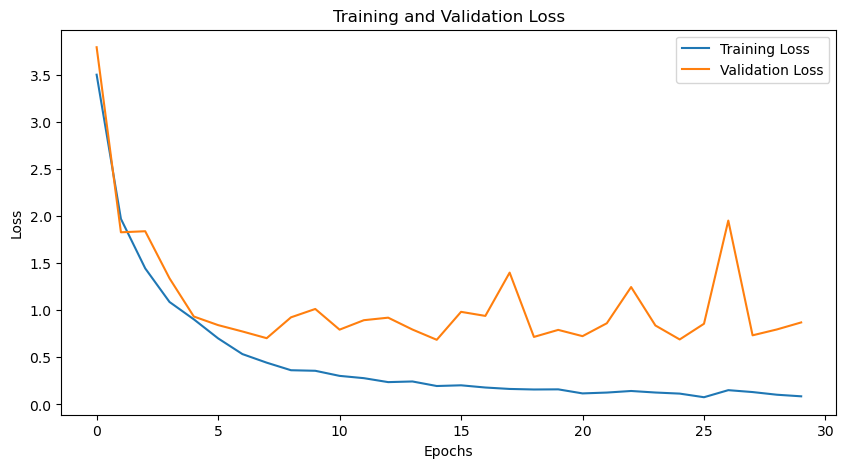

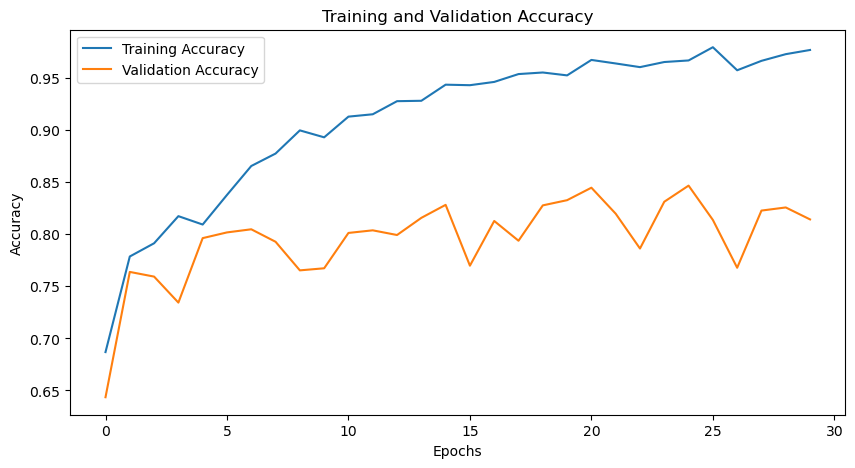

In [59]:
# Fit the model
epochs = 60
batch_size = 60
history = model_dense.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                                    epochs=epochs, verbose=1, steps_per_epoch=X_train.shape[0] // batch_size,
                                    callbacks=[learning_rate_reduction,early_stopping], validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

63/63 [==============================] - 16s 261ms/step


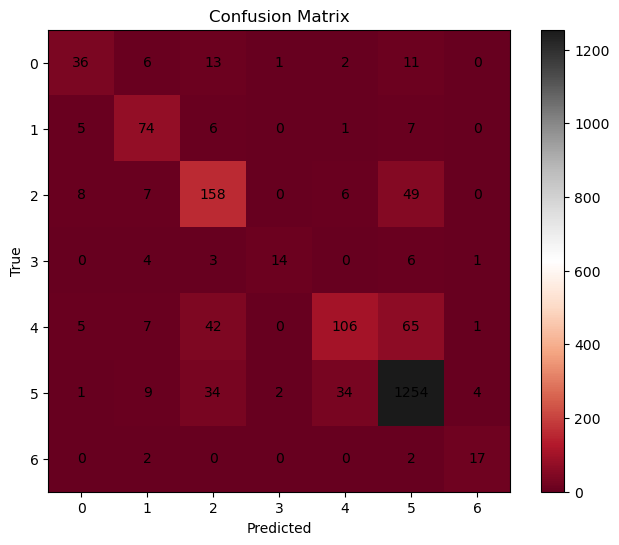

In [64]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'model_dense' trained and 'X_test', 'y_test' ready

# Get the predicted labels from the model
y_pred = model_dense.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap with red and black color scheme
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.RdGy)  # Red and black colormap
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
plt.xticks(np.arange(confusion_mtx.shape[1]), range(confusion_mtx.shape[1]))
plt.yticks(np.arange(confusion_mtx.shape[0]), range(confusion_mtx.shape[0]))

# Display the numbers inside the heatmap cells
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, str(confusion_mtx[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

# DenseNet121 Useing Categorical Data

In [65]:
split_proportion = 0.8

# Randomly shuffle the rows of the DataFrame
shuffled_data = meta.sample(frac=1, random_state=41)  # random_state for reproducibility

# Calculate the number of rows for the first piece
total_rows = shuffled_data.shape[0]
split_size = int(total_rows * split_proportion)

# Split the DataFrame into two pieces
Train = shuffled_data.iloc[:split_size]
Test = shuffled_data.iloc[split_size:]

In [66]:
from keras.utils import to_categorical

X_train_image = Train['image']
y_train = to_categorical(Train['dx_code'])

X_test_image = Test['image']
y_test = to_categorical(Test['dx_code'])

In [67]:
# Convert Pandas Series to NumPy arrays
X_train_image = np.array(X_train_image.tolist())
X_test_image = np.array(X_test_image.tolist())

# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train_image = X_train_image.reshape(X_train_image.shape[0], 75, 100, 3)
X_test_image = X_test_image.reshape(X_test_image.shape[0], 75, 100, 3)

In [68]:
from sklearn.preprocessing import StandardScaler

categorical_data_train = Train[[ 'age' ,'dx_type' ,"localization" ]]
categorical_data_test = Test[[ 'age' ,'dx_type' ,"localization" ]]

# Define the columns you want to scale
columns_to_scale = ['age']

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the column to a 2D array before fitting the scaler
categorical_data_train[columns_to_scale] = scaler.fit_transform(categorical_data_train[columns_to_scale].values.reshape(-1, 1))
categorical_data_test[columns_to_scale] = scaler.transform(categorical_data_test[columns_to_scale].values.reshape(-1, 1))

In [69]:
# List of columns to one-hot encode
columns_to_encode = ['dx_type', 'localization']

# Perform one-hot encoding using get_dummies
encoded_train = pd.get_dummies(categorical_data_train, columns=columns_to_encode)
encoded_test = pd.get_dummies(categorical_data_test, columns=columns_to_encode)


In [70]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


categorical_input = Input(shape=(20,))

# Load the pre-trained DenseNet-121 model (Same as before)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 95
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# After GlobalAveragePooling2D layer, concatenate with the categorical input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

# Add Custom Layers for Categorical Data
y = Dense(64, activation='relu')(categorical_input)
x = Concatenate()([x, y])

x = BatchNormalization()(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model with both image and categorical inputs
model_dense = Model(inputs=[base_model.input, categorical_input], outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

Epoch 1/60
134/134 [==============================] - 208s 1s/step - loss: 3.4286 - accuracy: 0.6977 - val_loss: 3.2487 - val_accuracy: 0.6196 - lr: 4.9930e-04
Epoch 2/60
134/134 [==============================] - 190s 1s/step - loss: 1.7462 - accuracy: 0.8109 - val_loss: 1.7078 - val_accuracy: 0.7703 - lr: 4.9860e-04
Epoch 3/60
134/134 [==============================] - 198s 1s/step - loss: 1.1495 - accuracy: 0.8462 - val_loss: 1.1851 - val_accuracy: 0.7843 - lr: 4.9789e-04
Epoch 4/60
134/134 [==============================] - 193s 1s/step - loss: 0.7273 - accuracy: 0.8908 - val_loss: 0.9185 - val_accuracy: 0.8153 - lr: 4.9719e-04
Epoch 5/60
134/134 [==============================] - 200s 1s/step - loss: 0.5000 - accuracy: 0.9172 - val_loss: 0.7414 - val_accuracy: 0.8333 - lr: 4.9649e-04
Epoch 6/60
134/134 [==============================] - 188s 1s/step - loss: 0.3367 - accuracy: 0.9427 - val_loss: 0.8100 - val_accuracy: 0.8133 - lr: 4.9579e-04
Epoch 7/60
134/134 [====================

134/134 [==============================] - 211s 2s/step - loss: 0.0736 - accuracy: 0.9830 - val_loss: 0.9315 - val_accuracy: 0.8168 - lr: 4.8540e-04
Epoch 22/60
134/134 [==============================] - 227s 2s/step - loss: 0.0891 - accuracy: 0.9789 - val_loss: 0.9751 - val_accuracy: 0.8223 - lr: 4.8471e-04
Epoch 23/60
134/134 [==============================] - 195s 1s/step - loss: 0.0588 - accuracy: 0.9874 - val_loss: 0.7435 - val_accuracy: 0.8487 - lr: 4.8403e-04
Epoch 24/60
134/134 [==============================] - 189s 1s/step - loss: 0.0384 - accuracy: 0.9928 - val_loss: 0.6173 - val_accuracy: 0.8527 - lr: 4.8335e-04
Epoch 25/60
134/134 [==============================] - 188s 1s/step - loss: 0.0307 - accuracy: 0.9939 - val_loss: 0.8893 - val_accuracy: 0.8452 - lr: 4.8267e-04
Epoch 26/60
134/134 [==============================] - 190s 1s/step - loss: 0.0397 - accuracy: 0.9926 - val_loss: 0.9387 - val_accuracy: 0.8382 - lr: 4.8198e-04
Epoch 27/60
134/134 [=========================

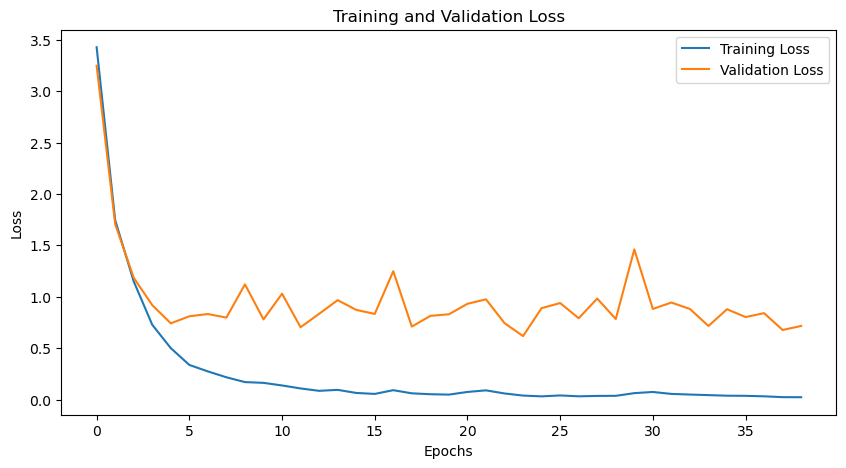

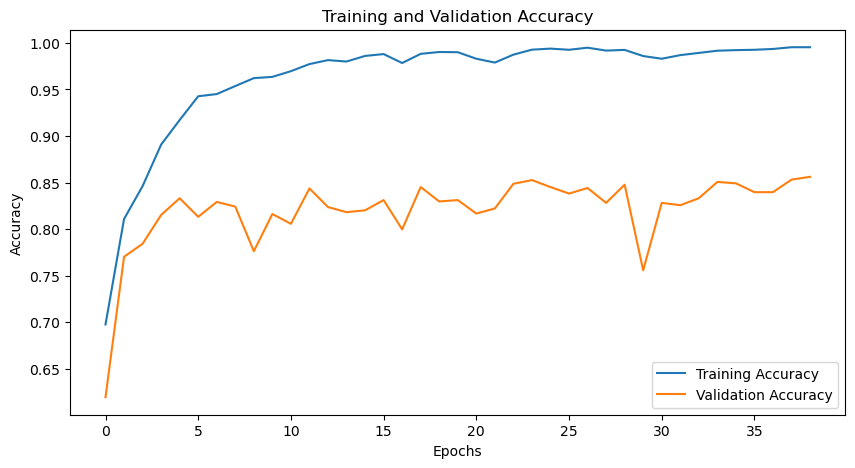

In [71]:
# Train the model with data augmentation and callbacks
epochs = 60
batch_size = 60
history = model_dense.fit(
    [X_train_image, encoded_train],  # Update with your actual image and categorical training data
    y_train, epochs=epochs, batch_size=batch_size,
    callbacks=[learning_rate_reduction , early_stopping], validation_data=([X_test_image, encoded_test], y_test)
)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

63/63 [==============================] - 18s 288ms/step


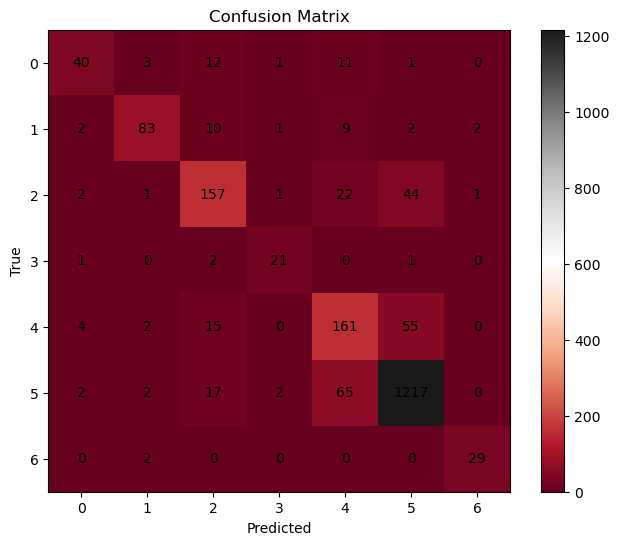

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.78      0.59      0.67        68
     Class 1       0.89      0.76      0.82       109
     Class 2       0.74      0.69      0.71       228
     Class 3       0.81      0.84      0.82        25
     Class 4       0.60      0.68      0.64       237
     Class 5       0.92      0.93      0.93      1305
     Class 6       0.91      0.94      0.92        31

    accuracy                           0.85      2003
   macro avg       0.81      0.78      0.79      2003
weighted avg       0.85      0.85      0.85      2003



In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Train the model and obtain the history

# Assuming you have 'model_dense' trained and 'X_test_image', 'encoded_test', 'y_test' ready

# Get the predicted labels from the model
y_pred_probs = model_dense.predict([X_test_image, encoded_test])
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.RdGy)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
num_classes = confusion_mtx.shape[0]
plt.xticks(np.arange(num_classes), range(num_classes))
plt.yticks(np.arange(num_classes), range(num_classes))

# Display the numbers inside the heatmap cells
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion_mtx[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the confusion matrix plot
plt.show()

# Generate a classification report
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']  # Update with your class names
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_names)

print("Classification Report:\n", classification_rep)

In [ ]:
model_dense.save('densenet_model.h5')

In [77]:
model_dense.save('skin_cancer_model.h5')

In [86]:
model_dense.save('trained_skin_cancer_model.h5')

In [87]:
import tensorflow as tf

# Load the Keras model
model_dense = tf.keras.models.load_model('trained_skin_cancer_model.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_dense)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('skin_cancer_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/tmpq181baz3/assets


INFO:tensorflow:Assets written to: /var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/tmpq181baz3/assets
2023-08-08 16:03:58.957579: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-08 16:03:58.957600: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-08 16:03:58.966384: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/tmpq181baz3
2023-08-08 16:03:59.038099: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-08 16:03:59.038124: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/tmpq181baz3
2023-08-08 16:03:59.255053: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-08 16:04:00.961287: I tensorflow/cc/saved_model/loader.cc:215] Running initialization